# EcoWasteClassifier — Тестирование модели локально

Готовая модель для определения типа мусора по фото  
6 классов: КАРТОН • СТЕКЛО • МЕТАЛЛ • БУМАГА • ПЛАСТИК • ОБЫЧНЫЙ МУСОР

In [13]:
# === ИМПОРТЫ И ПРОВЕРКА ОКРУЖЕНИЯ ===
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Определяем, где мы: в Colab или локально
try:
    from google.colab import files
    IN_COLAB = True
    print("Запущено в Google Colab")
except:
    IN_COLAB = False
    print("Запущено локально (Jupyter/VS Code)")

# === ЗАГРУЗКА МОДЕЛИ ===
model_path = "EcoWasteClassifier.h5"

if not os.path.exists(model_path):
    raise FileNotFoundError(
        f"Файл модели не найден!\n"
        f"Убедись, что '{model_path}' лежит в той же папке, что и этот ноутбук."
    )

model = load_model(model_path)
print("Модель EcoWasteClassifier.h5 успешно загружена!")

Запущено локально (Jupyter/VS Code)


Модель EcoWasteClassifier.h5 успешно загружена!


In [14]:
# Быстарая проверака работоспособности:

# Создаём чёрное изображение 224×224 (как любит MobileNetV2)
dummy_img = np.zeros((224, 224, 3), dtype=np.uint8)
dummy_img = image.array_to_img(dummy_img)
dummy_img.save("test_black.jpg")

# Делаем предсказание
img = image.load_img("test_black.jpg", target_size=(224, 224))
x = image.img_to_array(img) / 255.0
x = np.expand_dims(x, axis=0)

pred = model.predict(x, verbose=0)
classes = ['КАРТОН', 'СТЕКЛО', 'МЕТАЛЛ', 'БУМАГА', 'ПЛАСТИК', 'ОБЫЧНЫЙ МУСОР']
print("Предсказание на чёрном изображении:")
for i, prob in enumerate(pred[0]):
    print(f"  {classes[i]:15} → {prob*100:6.2f}%")
print(f"Самый вероятный класс: {classes[np.argmax(pred[0])]}")

Предсказание на чёрном изображении:
  КАРТОН          →   0.11%
  СТЕКЛО          →  97.44%
  МЕТАЛЛ          →   1.39%
  БУМАГА          →   0.14%
  ПЛАСТИК         →   0.11%
  ОБЫЧНЫЙ МУСОР   →   0.82%
Самый вероятный класс: СТЕКЛО


## Реализуем функцию для теста предсказаний EcoWasteClassifier.h5

In [ ]:
def predict_waste(image_path=None):
    """
    Универсальная функция — работает и в Colab, и локально.
    Просто запусти: predict_waste() или predict_waste("examples/фото.jpg")
    """
    # Если путь не указан — предлагаем загрузить
    if image_path is None:
        if IN_COLAB:
            print("Загрузи фото мусора (перетащи или выбери файл):")
            uploaded = files.upload()
            if not uploaded:
                print("Ничего не загружено")
                return
            image_path = list(uploaded.keys())[0]
        else:
            path = input("Введи путь к фото (например, examples/cardboard.jpg): ").strip('\'"')
            if not path or not os.path.exists(path):
                print("Файл не найден!")
                return
            image_path = path

    # Предобработка 
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Предсказание 
    pred = model.predict(img_array, verbose=0)[0]
    idx = np.argmax(pred)
    confidence = pred[idx]

    # Классы и русские названия
    classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
    ru_names = ['КАРТОН', 'СТЕКЛО', 'МЕТАЛЛ', 'БУМАГА', 'ПЛАСТИК', 'ОБЫЧНЫЙ МУСОР']
    
    label_en = classes[idx]
    label_ru = ru_names[idx]

    # Цвет по уверенности
    color = 'darkgreen' if confidence > 0.8 else 'orange' if confidence > 0.5 else 'red'

    # Красивый вывод
    plt.figure(figsize=(10, 9))
    plt.imshow(img)
    plt.title(f"{label_ru}\nУверенность: {confidence*100:.1f}%", 
              fontsize=28, color=color, pad=30, weight='bold')
    plt.axis('off')
    plt.show()

    print(f"Файл: {os.path.basename(image_path)}")
    print(f"Класс: {label_en} → {label_ru}")
    print(f"Уверенность: {confidence*100:.1f}%\n")

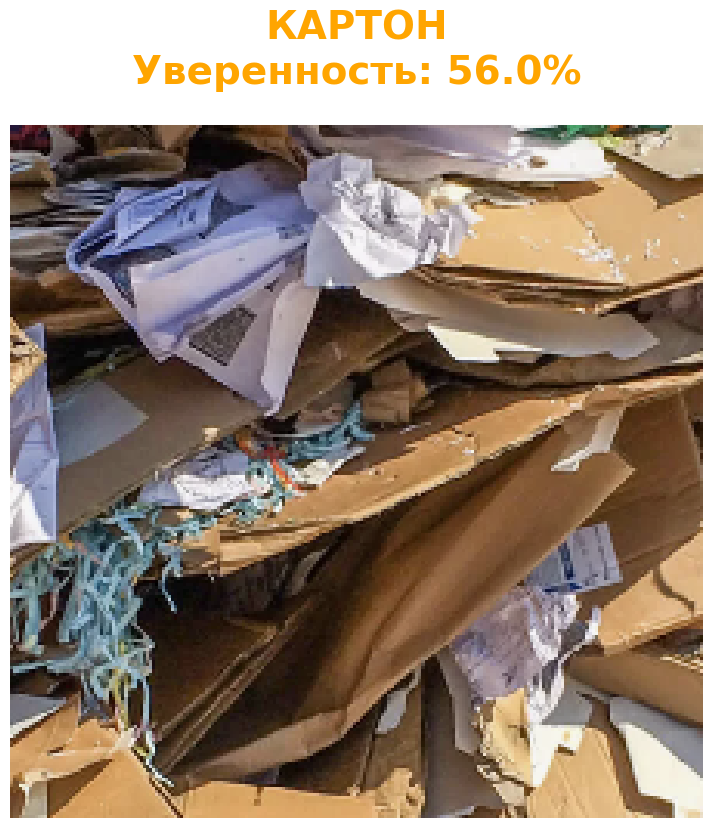

Файл: Screenshot from 2025-12-12 15-11-52.png
Класс: cardboard → КАРТОН
Уверенность: 56.0%



In [16]:
predict_waste("examples/Screenshot from 2025-12-12 15-11-52.png")

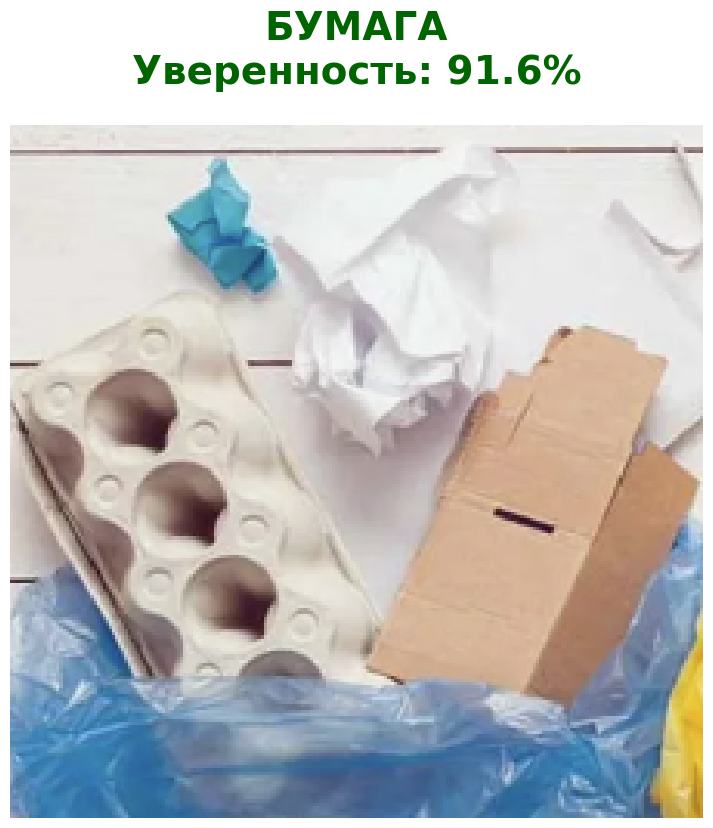

Файл: Screenshot from 2025-12-12 15-12-10.png
Класс: paper → БУМАГА
Уверенность: 91.6%



In [17]:
predict_waste("examples/Screenshot from 2025-12-12 15-12-10.png")

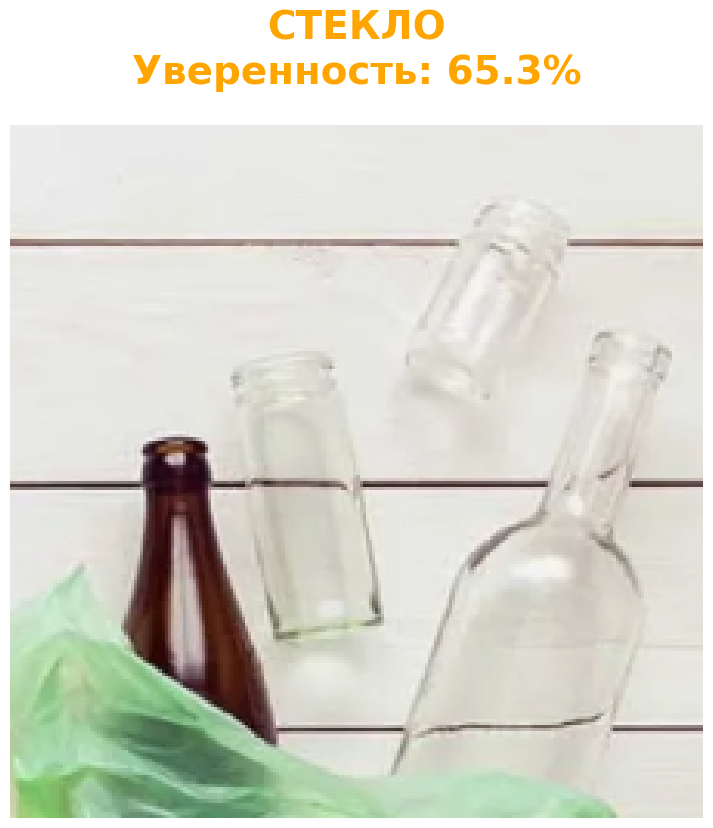

Файл: Screenshot from 2025-12-12 15-12-14.png
Класс: glass → СТЕКЛО
Уверенность: 65.3%



In [18]:
predict_waste("examples/Screenshot from 2025-12-12 15-12-14.png")

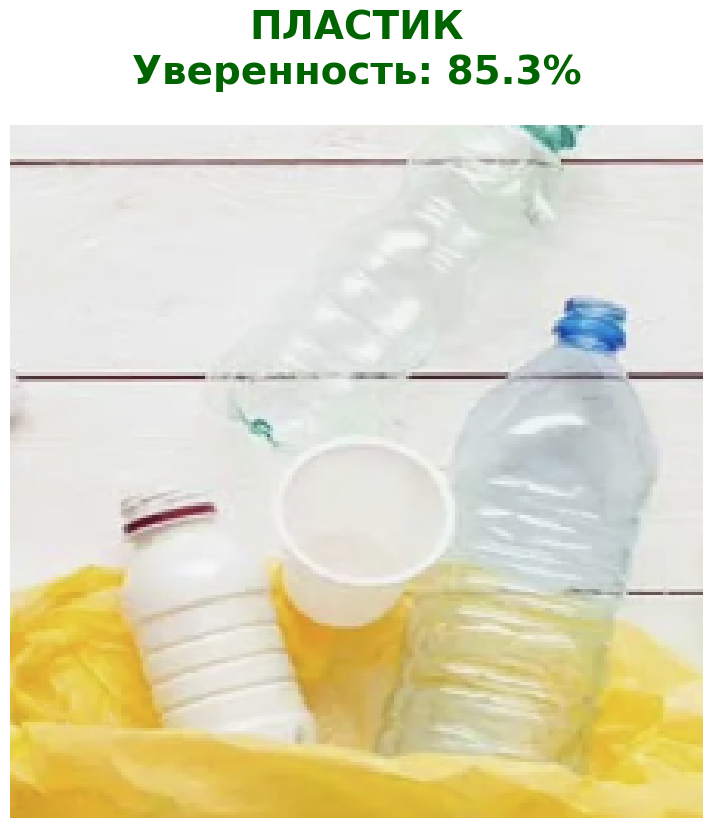

Файл: Screenshot from 2025-12-12 15-12-18.png
Класс: plastic → ПЛАСТИК
Уверенность: 85.3%



In [19]:
predict_waste("examples/Screenshot from 2025-12-12 15-12-18.png")